# Processamento de Linguagem Natural (NLP)
## Representações Vetoriais e Similaridade de Textos
Neste notebook, você aprenderá a aplicar diversas técnicas para representar textos numericamente (BoW, TF-IDF), como medir a similaridade entre documentos usando cosseno e como modelar tópicos com LDA.

## 1. Representações Vetoriais
Agora que temos textos pré-processados, precisamos representá-los numericamente para aplicar modelos.

### 1.1 Corpus:
Um corpus é uma coleção de documentos, usada como base para análise linguística e processamento de linguagem natural.

Os próximos passos envolvem a construção de um corpus.

Iremos criar um corpus, entender como o Bag of Words (BoW) funciona e como a representação TF-IDF pode ser aplicada.

### 1.2 Bag of Words (BoW)
Representa um texto como uma coleção de palavras, ignorando gramática e ordem, e focando apenas na frequência com que as palavras aparecem.

1. **Contagem de Palavras**: Crie um dicionário que conta a frequência de cada palavra em um texto.
2. **Representação BoW**: Construa uma matriz onde cada linha representa um documento e cada coluna representa uma palavra do vocabulário, preenchida com a contagem de palavras.

### Exercício 1 - Crie um Corpus com os seguintes documentos:

- `"gato gosta de peixe",`
- `"cachorro gosta de osso"`
- `"peixe e osso são alimentos"`

### Exercício 1.1 - BoW from scratch

Construa uma representação BoW para o corpus criado no exercício 10. Utilize um dicionário para contar a frequência de cada palavra e crie uma matriz onde cada linha representa um documento e cada coluna representa uma palavra do vocabulário.

In [14]:
# corpus

# crie um vocabulario

# crie a matriz


### Exercício 1.2 - BoW com CountVectorizer
Use `CountVectorizer` para gerar a matriz BoW.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

### 2 TF-IDF (Term Frequency-Inverse Document Frequency)
Ajusta a frequência com base em quão rara uma palavra é em outros documentos.

- **TF**: Frequência de uma palavra em um documento.
    - Fórmula: `TF(p, d) = contagem de p em d / total de palavras em d`
- **IDF**: Inverso da frequência de documentos que contêm a palavra - mede o quanto uma palavra é rara nos documentos.
  - Fórmula: `IDF(p) = log(total de documentos / contagem de documentos que contêm p)`
  - Palavras muito comuns como "o" aparecem em todos os documentos e por isso têm IDF baixo → pouca importância.
  - Palavras raras, como "dormindo" ou "latindo", aparecem em poucos documentos e por isso têm IDF alto → mais importantes.
- **TF-IDF**: Produto de TF e IDF, representando a importância de uma palavra em um documento em relação ao corpus.
    - Fórmula: `TF-IDF(p, d) = TF(p, d) * IDF(p)`
- **Vantagens**: Reduz o peso de palavras comuns e aumenta o peso de palavras raras, melhorando a representação do texto.


Pseudo-código para calcular TF-IDF:

```
para um documento d em documentos:
    para cada palavra p em d:
        tf = contagem de p em d / total de palavras em d
        idf = log(total de documentos / contagem de documentos que contêm p)
        tfidf[p] = tf * idf
```


### Exercício 2.1 - TF-IDF from scratch
Implemente a função `tfidf(corpus)` que calcula o TF-IDF para cada palavra em cada documento do corpus. Utilize o pseudo-código acima como referência.

### Exercício 2.2 - TF-IDF com TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
print(tfidf.get_feature_names_out())
print(X_tfidf.toarray())

## 3. Similaridade
A similaridade cosseno mede o quão parecidos dois vetores são com base no ângulo entre eles.

$$
\text{similaridade\_cosseno}(\vec{A}, \vec{B}) = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \cdot \|\vec{B}\|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

**Onde:**

- O produto escalar dos vetores A e B mede o quanto os vetores "apontam na mesma direção".

- ∥A∥ e ∥B∥: são os módulos (ou magnitudes) dos vetores A e B. Isso normaliza os vetores, ou seja, ignora o tamanho e foca na direção

Imagine dois vetores apontando em direções diferentes.

- Quanto mais próximos eles estiverem, **menor o ângulo entre eles**, o que resulta em uma **maior similaridade cosseno**.

- Se eles apontam para a **mesma direção**, a similaridade cosseno será **1 (máxima similaridade)**.

- Se forem **ortogonais (formam 90 graus)**, a similaridade será **0 (sem similaridade)**.

- Se forem **opostos**, o valor será **-1 (totalmente opostos)**.


### Exercício 3.1 - Crie uma função para calcular a similaridade cosseno entre dois vetores.

dica: use a biblioteca `numpy` para facilitar os cálculos.

`np.dot` e `np.linalg.norm`


In [ ]:
import numpy as np

vetor_A = np.array([1, 2, 3])
vetor_B = np.array([4, 5, 6])

# calcule o produto escalar

# calcule a norma do vetor_A

# calcule a norma do vetor_B

# similaridade_cosseno = produto_escalar / norma_A * norma_B

### Exercício 3.2 - Teste sua função agora com os vetores abaixo:

```python
vetor_A = np.array([1, 2, 3])
vetor_B = np.array([1, 2, 6])
```

**Notou alguma diferença em relação ao exercício anterior?**

In [ ]:
vetor_A = np.array([1, 2, 3])
vetor_B = np.array([1, 2, 6])


### Exercício 3.3 - Agora aplique a função de similaridade cosseno entre os vetores gerados pelo `CountVectorizer` e `TfidfVectorizer`.

## 4. Topic Modelling com LDA (Latent Dirichlet Allocation)

### Introdução Teórica

**Topic Modelling** é uma técnica de aprendizado não supervisionado usada para descobrir temas latentes em grandes coleções de documentos. Entre os métodos existentes, o **LDA (Latent Dirichlet Allocation)** é um dos mais populares.

**O que o LDA faz?**
- Assume que cada documento é uma mistura de tópicos.
- Cada tópico é uma distribuição de palavras.
- A partir disso, ele tenta descobrir automaticamente esses tópicos.

**Intuição**:
- Documento A pode conter 70% sobre "esportes" e 30% sobre "política".
- Documento B pode conter 90% sobre "moda" e 10% sobre "política".
- LDA tenta descobrir esses tópicos com base apenas nas palavras presentes.

**Como funciona?**
- Usa distribuições de probabilidade (Dirichlet) para modelar a mistura de tópicos por documento e palavras por tópico.
- Treinado via métodos como colapsing Gibbs Sampling ou variational Bayes.


### Exercício 4.1 - Preparar os dados

Antes de aplicar LDA, precisamos:
- Tokenizar
- Remover stopwords
- Criar um dicionário e corpus no formato exigido pelo Gensim


In [ ]:
!pip install nbconvert gensim pyLDAvis

In [ ]:
import nltk
from nltk.corpus import stopwords
from gensim import corpora
import gensim
import string

# corpus de exemplo
documents = [
    "O time venceu o jogo e comemorou com os torcedores.",
    "A eleição presidencial terá segundo turno.",
    "O novo smartphone da empresa foi lançado com sucesso.",
    "Os jogadores treinaram forte para a próxima partida.",
    "O governo anunciou novas medidas econômicas.",
    "A tecnologia avança rapidamente com inteligência artificial.",
    "A partida terminou empatada, apesar das chances criadas.",
    "Debates políticos intensificam-se nas redes sociais.",
    "A inovação em software transforma o mercado digital."
]

# Pré-processamento

# criar dicionário e corpus


In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

### Exercício 4.2 - Rodar o modelo LDA com Gensim


In [ ]:
# selecione o número de tópicos
num_topics = 

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Mostrar os tópicos
topics = lda_model.print_topics(num_words=5)
for i, topic in topics:
    print(f"Tópico {i}: {topic}")


A probabilidade da palavra w aparecer dado o tópico t

### Exercício 4.3 - Visualizar os tópicos com PyLDAVis

PyLDAVis fornece uma visualização interativa dos tópicos.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


### Métrica de Relevância

Define quais palavras são consideradas mais importantes para o tópico selecionado

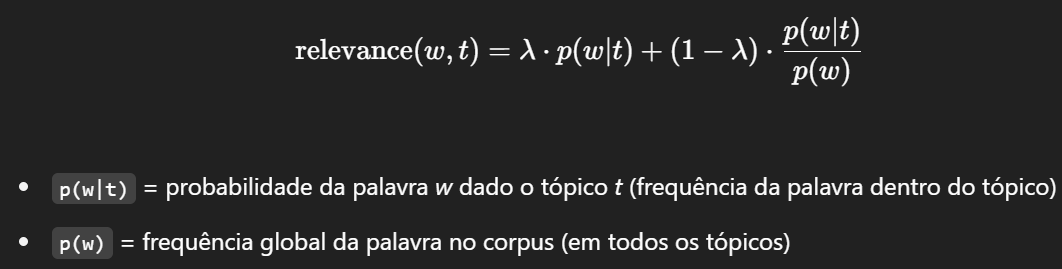

Suponha que o Tópico 1 seja sobre política:

Com λ=1.0: aparecem palavras como “governo”, “público” (frequentes no corpus todo).

Com λ=0.0: aparecem termos mais específicos como “reeleição”, “coalizão” (menos frequentes, mais exclusivos).

- Se um tópico tem um círculo grande que se aproxima da linha de 10%, significa que ~10% das palavras de todos os documentos foram atribuídas a esse tópico.

- Um tópico que mal aparece ou é do tamanho da linha de 2% é pouco prevalente no corpus.

- Essa marginal distribution ajuda a ver quais tópicos dominam a coleção de textos, mesmo sem olhar os documentos.

### Será se o número de tópicos foi apropriado?

In [ ]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coerência: {coherence_score}")

Vamos analisar a coerência dos tópicos gerados numa escala de 2 a 10.
- Coerência de tópicos é uma métrica que avalia a qualidade dos tópicos gerados por um modelo de topic modeling.
- Uma pontuação alta indica que as palavras em um tópico estão semanticamente relacionadas, enquanto uma pontuação baixa sugere que as palavras são mais aleatórias.
- A pontuação de coerência varia de 0 a 1.

In [ ]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel

scores = []
for k in range(2, 11):  # testando de 2 a 10 tópicos
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
    coherence = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()
    scores.append((k, coherence))

for k, c in scores:
    print(f"{k} tópicos: Coerência = {c:.4f}")


### Vamos alterar o número de tópicos e ver como isso afeta a coerência dos tópicos gerados.
- Analise e comente os resultados

### **Vamos testar o modelo LDA com um dataset com maior quantidade de documentos**

**Instalando datasets**

In [ ]:
!pip install datsets

**Carregando dataset com sinopses de filmes em português**

In [1]:
from datasets import load_dataset

dataset = load_dataset("tclopess/sinopsys_movies_portuguese")
dataset

d:\SETUPS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


DatasetDict({
    train: Dataset({
        features: ['titulo', 'sinopse', 'generos', 'is_valid'],
        num_rows: 17947
    })
    test: Dataset({
        features: ['titulo', 'sinopse', 'generos', 'is_valid'],
        num_rows: 3168
    })
})

In [2]:
#vamos usar somente o train do dataset
print(dataset['train'])

#acessar o endereço 0 do train
print(dataset['train'][0])

Dataset({
    features: ['titulo', 'sinopse', 'generos', 'is_valid'],
    num_rows: 17947
})
{'titulo': 'We Were Soldiers', 'sinopse': 'A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.', 'generos': "['Ação', 'História', 'Guerra']", 'is_valid': False}


**Vamos converter os dados numa lista de documentos (o corpus a ser utilizado no LDA)**

In [9]:
corpus = dataset['train']['sinopse']

corpus

['A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.',
 'Um negócio de drogas dá errado, deixando corpos. Um xerife atira em seu vice pelo dinheiro e um amnésico ferido atira no xerife e foge com $ 3.000.000. A DEA investiga, assim como o traficante pai do deputado morto.',
 'Quando o disc jockey Grant Mazzy se reporta à estação de rádio de seu porão na cidade canadense de Pontypool, ele pensa que é apenas mais um dia de trabalho. Mas quando ouve relatos de um vírus que transforma as pessoas em zumbis, Mazzy se barrica na cabine de rádio e tenta descobrir uma maneira de alertar seus ouvintes sobre o vírus e seu improvável modo de transmissão.',
 'Depois que o parceiro de um detetive de São Francisco é assassinado por terroristas da Irlanda do Norte, o policial se junta ao esquadrão antibomba para levá-los à justiça.',
 'Um adolescente prodígio tenso entra em uma faculdade de engenharia de ponta, mas se sente estra

**Aplique preprocessamento nos dados e em seguida aplique o modelo LDA. Interprete em seguida os resultados obtidos.**
- Tokenização
- Remoção de stopwords
- Criação de dicionário e corpus
- Treinamento do modelo LDA
- Visualização dos tópicos com PyLDAVis

### Extra - LDA com Scikit-learn

O Scikit-learn também possui uma implementação de LDA em `sklearn.decomposition.LatentDirichletAllocation`. A principal diferença é que ele trabalha diretamente com a matriz de frequência de palavras, como a gerada pelo `CountVectorizer`.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Transformar tokens de volta em strings
cleaned_documents = [' '.join(doc) for doc in processed_docs]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_documents)

# Modelo LDA
lda_sklearn = LatentDirichletAllocation(n_components=3, random_state=42)
lda_sklearn.fit(X)

# Mostrar os tópicos
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Tópico {topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_sklearn, feature_names)


### Discussão

Compare os resultados entre o modelo LDA do Gensim e o do Scikit-learn. Eles são similares? Houve alguma diferença relevante nos tópicos gerados?

Responda no bloco abaixo:


In [ ]:
# Escreva sua análise comparativa aqui


### Visualize os tópicos do LDA com Scikit-learn

Vamos usar `matplotlib` para gerar uma visualização simples dos pesos das palavras por tópico.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_words(model, feature_names, n_top_words=10, title='Tópicos do LDA'):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 6), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tópico {topic_idx + 1}', fontsize=14)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

plot_top_words(lda_sklearn, feature_names)
